# Bulldozer Price Prediction with a Machine Learning Model

This notebook aims to predict the future prices of a set of bulldozers from data of its present and past sales.

## 1. Problem Definition

> To predict the potential prices of a set of bulldozers with respect to the prices of the past and present


## 2. Data

The dataset used is sourced from Kaggle Blueboo for Bulldozers competition.

There are 3 main datasets:
+ Train.csv is the training set, which contains data through the end of 2011.
+ Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 
+ Test.csv is the test set, which contains data from May 1, 2012 - November 2012. 

Source Link: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

## 3. Evaluation

The main evaluation metric to be used is RMSLE - Root Mean Squared Log Error between the actual and predicted prices.

> The aim is to minimize the error in prediction, that is, the RMSLE value, in the model.

For further information: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Source data dictionary: https://docs.google.com/spreadsheets/d/1Ll2p4cl0Bi9co-fCW27VUBJWU8Zu1yPq/edit?usp=sharing&ouid=113789987961128033720&rtpof=true&sd=true

In [75]:
# Importing everything required

# Regular Exploratory Data Analysis and plotting libraries - import
# Regular EDA:
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots within notebook
%matplotlib inline

# Modelling - import
# Models:
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation Metrics:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

# Data Imputation and Numerical Encoding:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Pipeline creation:
from sklearn.pipeline import Pipeline

#Exporting and importing model:
import pickle

In [2]:
# Traning and validation sets:
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.shape

(412698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Data Visualization

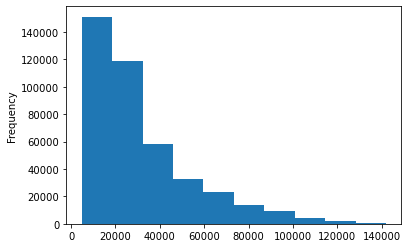

In [6]:
df["SalePrice"].plot.hist();

In [7]:
# Parsing Dates for Time Series Data

df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
               low_memory=False,
               parse_dates=["saledate"])
df["saledate"].dtype

dtype('<M8[ns]')

In [8]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


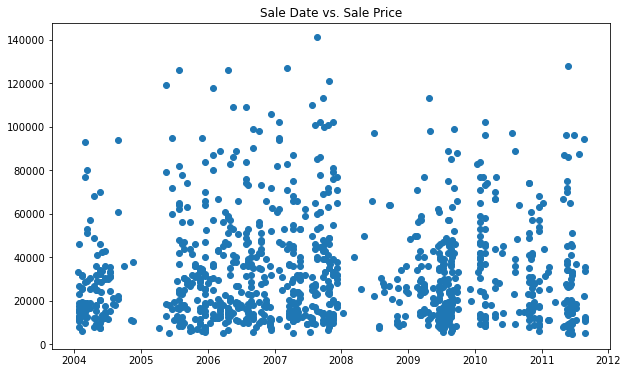

In [12]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
ax.set_title("Sale Date vs. Sale Price");

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df["saledate"].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [15]:
# Sorting data by date, as this is a time series data

df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Making a copy of OG dataset

copy_df=df.copy()
copy_df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

### Adding datetime paramteres to saledate

In [21]:
copy_df["saleyear"]=df["saledate"].dt.year
copy_df["salemonth"]=df["saledate"].dt.month
copy_df["saleday"]=df["saledate"].dt.day
copy_df["saledayofweek"]=df["saledate"].dt.dayofweek
copy_df["saledayofyear"]=df["saledate"].dt.dayofyear

In [22]:
copy_df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [23]:
# salesdate is covered by newer columns hence it is removed

copy_df.drop("saledate",axis=1,inplace=True)

### Data Distribution

In [25]:
df["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [26]:
df["Stick"].value_counts()

Standard    49854
Extended    31242
Name: Stick, dtype: int64

In [27]:
df["Travel_Controls"].value_counts()

None or Unspecified    71447
Differential Steer      5257
Finger Tip              2693
2 Pedal                 1144
Lever                    902
Pedal                    423
1 Speed                   11
Name: Travel_Controls, dtype: int64

In [28]:
df["Steering_Controls"].value_counts()

Conventional           70774
Command Control          594
Four Wheel Standard      139
Wheel                     14
No                         1
Name: Steering_Controls, dtype: int64

In [29]:
df["YearMade"].value_counts()

1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
2012        1
1949        1
1942        1
2013        1
1937        1
Name: YearMade, Length: 73, dtype: int64

In [30]:
df["Tip_Control"].value_counts()

None or Unspecified    16832
Sideshift & Tip         7164
Tip                     1987
Name: Tip_Control, dtype: int64

In [31]:
df["Track_Type"].value_counts()

Steel     87463
Rubber    14730
Name: Track_Type, dtype: int64

### Converting strings into caterogical values

In [34]:
# Identifying string values

for label,content in copy_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Converting string-based columns to categories

for label,content in copy_df.items():
    if pd.api.types.is_string_dtype(content):
        copy_df[label]=content.astype("category").cat.as_ordered()

In [36]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [38]:
# Sample converted column and text labels

copy_df["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [39]:
# Sample converted column and its numerical values

copy_df["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [40]:
# Ratios of missing values

copy_df.isnull().sum()/len(copy_df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving preprocessed data

In [42]:
copy_df.to_csv("data/bluebook-for-bulldozers/train_temp.csv",index=False)`

## Filling missing values

### Filling numerical values

In [43]:
# Identifying numeric values

for label,content in copy_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [45]:
# Checking for numeric columns with missing values

for label,content in copy_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"{label}: {pd.isnull(content).sum()}")

auctioneerID: 20136
MachineHoursCurrentMeter: 265194


In [46]:
# Filling numeric rows with some value

for label,content in copy_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Binary column indicidicating if a value was missing before or not
            # There might be a reason for which some values were missing so to preserve that info, this column is made
            copy_df[label+"_missing"]=pd.isnull(content)
            # Filling missing values of OG column with median
            # Median is chosen because median is more robust than mean
            # Mean for large datasets will be very sensitive to the presence of outliers
            copy_df[label]=content.fillna(content.median())
            
# Checking for any leftover unfilled values
for label,content in copy_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"{label}: {pd.isnull(content).sum()}")

In [47]:
copy_df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_missing,MachineHoursCurrentMeter_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True
54653,1301884,23500.0,1182999,4123,132,99.0,1976,0.0,NaN,D6C,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
81383,1379228,31000.0,1082797,7620,132,99.0,1986,0.0,NaN,IT12,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
204924,1645390,11750.0,1527216,8202,132,99.0,1970,0.0,NaN,544,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
135376,1493279,63000.0,1363756,2759,132,99.0,1987,0.0,NaN,D5HII,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
113390,1449549,13000.0,1289412,3356,132,99.0,1966,0.0,NaN,12F,...,NaN,NaN,NaN,1989,1,31,1,31,False,True


In [48]:
copy_df["auctioneerID_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_missing, dtype: int64

In [49]:
copy_df["MachineHoursCurrentMeter_missing"].value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_missing, dtype: int64

In [51]:
# Identifying categorical values

for label,content in copy_df.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [52]:
# Checking for categorical columns with missing values

for label,content in copy_df.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(f"{label}: {pd.isnull(content).sum()}")

UsageBand: 339028
fiSecondaryDesc: 140727
fiModelSeries: 354031
fiModelDescriptor: 337882
ProductSize: 216605
Drive_System: 305611
Enclosure: 334
Forks: 214983
Pad_Type: 331602
Ride_Control: 259970
Stick: 331602
Transmission: 224691
Turbocharged: 331602
Blade_Extension: 386715
Blade_Width: 386715
Enclosure_Type: 386715
Engine_Horsepower: 386715
Hydraulics: 82565
Pushblock: 386715
Ripper: 305753
Scarifier: 386704
Tip_Control: 386715
Tire_Size: 315060
Coupler: 192019
Coupler_System: 367724
Grouser_Tracks: 367823
Hydraulics_Flow: 367823
Track_Type: 310505
Undercarriage_Pad_Width: 309782
Stick_Length: 310437
Thumb: 310366
Pattern_Changer: 310437
Grouser_Type: 310505
Backhoe_Mounting: 331986
Blade_Type: 330823
Travel_Controls: 330821
Differential_Type: 341134
Steering_Controls: 341176


In [53]:
# Turning categorical values into numerical values

for label,content in copy_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Binary column for missing values indication
        copy_df[label+"_missing"]=pd.isnull(content)
        # Turning categories into numbers
        # One is added to compensate for negative values of missing values
        copy_df[label]=pd.Categorical(content).codes+1
copy_df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_missing,False,True,False,True,False
Blade_Type_missing,False,True,False,True,False
Travel_Controls_missing,False,True,False,True,False
Differential_Type_missing,True,False,True,False,True


In [55]:
# Final check for leftover missing values

copy_df.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

## Modelling

### Model Driven Exploratory Data Analysis

**Models to try out:**
1. RandomForestRegressor

In [59]:
%%time
# Setting up timer to find out how much time it takes for fitting

# Instantiating model
model=RandomForestRegressor(n_jobs=1,
                           random_state=42)

# Fitting the model to the training data
model.fit(copy_df.drop("SalePrice",axis=1),copy_df["SalePrice"])

CPU times: total: 14min 35s
Wall time: 35min 53s


RandomForestRegressor(n_jobs=1, random_state=42)

In [62]:
# Scoring the model based on Coefficient of Determination
# R^2 - Default regression scoring parameter
# R^2 Scale - Negative infinity to one
# Scoring on the training data for a trial run
model.score(copy_df.drop("SalePrice",axis=1),copy_df["SalePrice"])

0.9875468079970562

### Splitting data into train and validation sets

According to the source, the train dataset spans upto 2011, and the validation set spans from 2011 to 2012. With accordance to this the data will be split.

In [63]:
df_val=copy_df[copy_df["saleyear"]==2012]
df_train=copy_df[copy_df["saleyear"]!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [65]:
# Split datasets as features and labels separately

X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

# Datasets Shapes
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Evaluation

The main goal is to minimize the RMSLE value

In [73]:
# Creating a custom evaluation function tailored to match our specific requirements

def rmsle(y_test,y_preds):
    '''
        Calculations Root Mean Squared Log Error between predicted values and actual values of the target
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Custom function to evaluate model on specific levels

def scores(model):
    '''
        Evaluates models on specific parameters
    '''
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)
    scores={"Training Dataset MAE":mean_absolute_error(y_train,train_preds),
           "Validation Dataset MAE":mean_absolute_error(y_val,val_preds),
           "Training Dataset RMSLE":rmsle(y_train,train_preds),
           "Validation Dataset RMSLE":rmsle(y_val,val_preds),
           "Training Dataset R^2":r2_score(y_train,train_preds),
           "Validation Dataset R^2":r2_score(y_val,val_preds)}
    return scores

## Tuning Hyperparameters

### Testing model on data subset

In [ ]:
model=RandomForestRegressor(n_jobs=1,
                           random_state=42,
                           max_samples=10000)
model

In [71]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [76]:
scores(model)

{'Training Dataset MAE': 1578.2015208725463,
 'Validation Dataset MAE': 6120.959637950402,
 'Training Dataset RMSLE': 0.08426351714047395,
 'Validation Dataset RMSLE': 0.25557446689440955,
 'Training Dataset R^2': 0.9875150955953674,
 'Validation Dataset R^2': 0.8727175969771312}

### Hyperparameter Tuning with RandomizedSearchCV

In [77]:
%%time

# Hyperparameter Grid
rf_grid={"n_estimators":np.arange(10,1000,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}

# Instantiating RandomizedSearchCV Model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)

# Fitting RSCV Model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 11min 58s
Wall time: 13min 9s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 

In [79]:
# Best RSCV Model hyperparameters

rs_model.best_params_

{'n_estimators': 880,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [80]:
# Evaluating RSCV model

scores(rs_model)

{'Training Dataset MAE': 6450.129779932422,
 'Validation Dataset MAE': 7746.013386796523,
 'Training Dataset RMSLE': 0.2905351553216122,
 'Validation Dataset RMSLE': 0.3129665415339881,
 'Training Dataset R^2': 0.816107131776855,
 'Validation Dataset R^2': 0.8045958911134101}

## Training with best parameters obtained

In [81]:
%%time

# Instantiate model with best possible hyperparameters obtained
best_model=RandomForestRegressor(n_estimators=40,
                                min_samples_leaf=1,
                                min_samples_split=14,
                                max_features=0.5,
                                n_jobs=-1,
                                max_samples=None,
                                random_state=42)

# Fit the best possible model with training data
best_model.fit(X_train,y_train)

CPU times: total: 4min 33s
Wall time: 1min 31s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [82]:
scores(best_model)

{'Training Dataset MAE': 2953.8161137163484,
 'Validation Dataset MAE': 5951.247761444453,
 'Training Dataset RMSLE': 0.14469006962371858,
 'Validation Dataset RMSLE': 0.24524163989538328,
 'Training Dataset R^2': 0.9588145522577225,
 'Validation Dataset R^2': 0.8818019502450094}

## Prediction with test data

In [95]:
test_df=pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
test_df.head(10)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
5,1227870,1068694,16747,121,3,2007,3670.0,High,2012-05-03,WB146-5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1227871,1012262,9133,121,3,2005,6759.0,High,2012-05-03,WB140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1227879,1064696,4699,121,3,1000,0.0,NaN,2012-05-03,544E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1227880,1067175,22145,121,3,1000,5528.0,Low,2012-05-03,650GIV,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
9,1227881,1007429,423,121,3,2000,10572.0,Medium,2012-05-03,PC228USLC2,...,None or Unspecified,"9' 8""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Preprocessing test data

In [89]:
def preprocessor(df):
    '''
        Transforms given dataframe into specified format
    '''
    df["saleyear"]=df["saledate"].dt.year
    df["salemonth"]=df["saledate"].dt.month
    df["saleday"]=df["saledate"].dt.day
    df["saledayofweek"]=df["saledate"].dt.dayofweek
    df["saledayofyear"]=df["saledate"].dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    
    return df

In [96]:
test_df=preprocessor(test_df)

In [98]:
set(X_train.columns)-set(test_df.columns)

{'auctioneerID_missing'}

In [100]:
test_df["auctioneerID_missing"]=False

In [101]:
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,auctioneerID_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [102]:
test_preds=best_model.predict(test_df)

C:\Users\Admin\Desktop\ML-Bootcamp\bulldozer-price-prediction\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [103]:
len(test_preds)

12457

In [105]:
test_preds[:10]

array([20614.36780887, 19897.80170658, 44852.21959446, 68346.32532323,
       39487.34970828, 35620.6223473 , 28830.30128309, 11735.68231638,
       25362.9137091 , 35525.48258716])

In [106]:
# Formatting predicted prices with indices
preds_df=pd.DataFrame()
preds_df["SalesID"]=test_df["SalesID"]
preds_df["SalesPrice"]=test_preds
preds_df

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [107]:
# Exporting predicted data
preds_df.to_csv("data/bluebook-for-bulldozers/test_predictions.csv",index=False)

## Feature Importance

In [108]:
best_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [113]:
# Feature Importance Visualization Function

def feature_importance_plot(columns,importances,n):
    '''
        Visualizes feature importances of top 20 features
    '''
    # Chaining
    df=(pd.DataFrame({"Features":columns,
                     "Feature Importances":importances})
       .sort_values("Feature Importances",ascending=False)
       .reset_index(drop=True))
    
    # Plotting the dataframe
    fig,ax=plt.subplots(figsize=(10,6))
    ax.barh(df["Features"][:n],df["Feature Importances"][:n])
    ax.set_xlabel("Features")
    ax.set_ylabel("Feature Importances")
    ax.set_title("Feature Importance Visualization")
    ax.invert_yaxis()

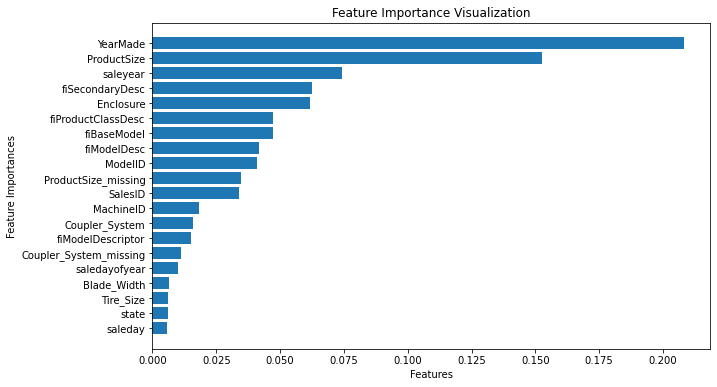

In [114]:
feature_importance_plot(X_train.columns,best_model.feature_importances_,20)